In [1]:
import re    # 정규표현식 관련된 작업에 필요한 패키지
import os    # I/O 관련된 작업에 필요한 패키지 
import pandas as pd     # 데이터 전처리 관련된 작업에 필요한 패키지
import numpy as np      # 데이터 array 작업에 필요한 패키지
import tensorflow as tf  # 딥러닝 관련된 작업에 필요한 패키지
import matplotlib.pyplot as plt    # 데이터 시각화에 관련된 작업에 필요한 패키지
from sklearn.model_selection import train_test_split  # 데이터 전처리에 필요한 패키지
import PIL
from PIL import Image
import glob
import cv2, sys

In [93]:
def crop_image(image,grade): ##구현중
    file_path = os.getenv('HOME') + '/aiffel/DeepBeef/' + str(grade) +'/'
    save_path = os.getenv('HOME') + '/aiffel/DeepBeef/' + str(grade) + '_cropped'
    
   
    image = cv2.imread(file_path + str(image))
    image_gray = cv2.imread(file_path + str(image) ,cv2.IMREAD_GRAYSCALE)

    if image is None:
        print("failed!")

    b,g,r = cv2.split(image) ## channel 분리 함수 
    image2 = cv2.merge([r,g,b]) ## 분리된 값을 재결합

    blur = cv2.GaussianBlur(image_gray, ksize=(3,3), sigmaX=0)
    ret, thresh1 = cv2.threshold(blur, 127, 255, cv2.THRESH_BINARY)

    edged = cv2.Canny(blur, 10, 250)

    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7,7))
    closed = cv2.morphologyEx(edged, cv2.MORPH_CLOSE, kernel)

    contours, _ = cv2.findContours(closed.copy(),cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    total = 0

    contours_image = cv2.drawContours(image, contours, -1, (0,255,0), 3)

    contours_xy = np.array(contours)
    contours_xy.shape

    # x의 min과 max 찾기
    x_min, x_max = 0,0
    value = list()
    for i in range(len(contours_xy)):
        for j in range(len(contours_xy[i])):
            value.append(contours_xy[i][j][0][0]) #네번째 괄호가 0일때 x의 값
            x_min = min(value)
            x_max = max(value)
    print(x_min)
    print(x_max)
    
    # y의 min과 max 찾기
    y_min, y_max = 0,0
    value = list()
    for i in range(len(contours_xy)):
        for j in range(len(contours_xy[i])):
            value.append(contours_xy[i][j][0][1]) #네번째 괄호가 0일때 x의 값
            y_min = min(value)
            y_max = max(value)

    x = x_min
    y = y_min
    w = x_max-x_min
    h = y_max-y_min

    img_trim = image[y:y+h, x:x+w]
    cv2.imwrite(save_path + 'org_trim.jpg', img_trim)
    org_image = cv2.imread('org_trim.jpg')


In [94]:
for filename in os.listdir(file_path):
    crop_image(filename,'Choice')

error: OpenCV(4.5.1) /tmp/pip-req-build-7m_g9lbm/opencv/modules/imgproc/src/smooth.dispatch.cpp:617: error: (-215:Assertion failed) !_src.empty() in function 'GaussianBlur'


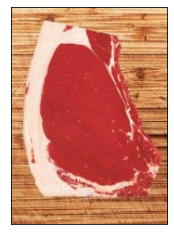

In [2]:
file_path = os.getenv('HOME') + '/aiffel/DeepBeef/Select'
image = cv2.imread(file_path +'/51.png')
image_gray = cv2.imread(file_path + '/51.png' ,cv2.IMREAD_GRAYSCALE)

if image is None:
    print("failed!")



b,g,r = cv2.split(image) ## channel 분리 함수 
image2 = cv2.merge([r,g,b]) ## 분리된 값을 재결합
 
plt.imshow(image2)
plt.xticks([])
plt.yticks([])
plt.show()

In [3]:
blur = cv2.GaussianBlur(image_gray, ksize=(3,3), sigmaX=0)
ret, thresh1 = cv2.threshold(blur, 127, 255, cv2.THRESH_BINARY)

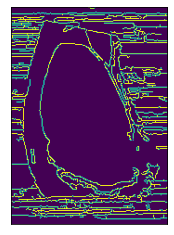

In [4]:
edged = cv2.Canny(blur, 10, 250)
plt.imshow(edged)
plt.xticks([])
plt.yticks([])
plt.show()
#cv2.waitKey(0)

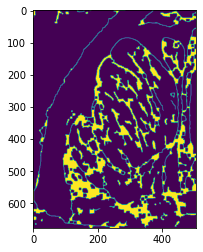

In [77]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7,7))
closed = cv2.morphologyEx(edged, cv2.MORPH_CLOSE, kernel)
plt.imshow(closed)

In [64]:
contours, _ = cv2.findContours(closed.copy(),cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
total = 0

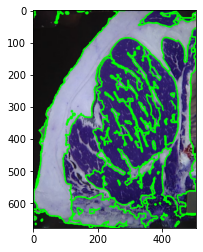

In [65]:
# 외곽선 그리는 용도. 이미지에 그리기 때문에 이 코드 적용하면 원래 이미지에
# 초록색 선 생김
contours_image = cv2.drawContours(image, contours, -1, (0,255,0), 3)
plt.imshow(contours_image)


In [66]:
contours_xy = np.array(contours)
contours_xy.shape

(36,)

In [67]:
# x의 min과 max 찾기
x_min, x_max = 0,0
value = list()
for i in range(len(contours_xy)):
    for j in range(len(contours_xy[i])):
        value.append(contours_xy[i][j][0][0]) #네번째 괄호가 0일때 x의 값
        x_min = min(value)
        x_max = max(value)
print(x_min)
print(x_max)
 
# y의 min과 max 찾기
y_min, y_max = 0,0
value = list()
for i in range(len(contours_xy)):
    for j in range(len(contours_xy[i])):
        value.append(contours_xy[i][j][0][1]) #네번째 괄호가 0일때 x의 값
        y_min = min(value)
        y_max = max(value)
print(y_min)
print(y_max)


0
506
0
677


In [68]:
x = x_min
y = y_min
w = x_max-x_min
h = y_max-y_min

In [69]:
img_trim = image[y:y+h, x:x+w]
cv2.imwrite('org_trim.jpg', img_trim)
org_image = cv2.imread('org_trim.jpg')

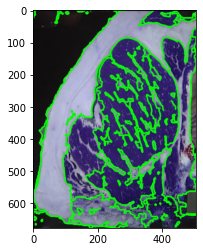

In [70]:
plt.imshow(org_image)

In [22]:

def load_train_data_v1(img_path): ## 함수 구상중
    # Prime : 0, Choice : 1, Select : 2
    number_of_data=300   
    img_size=180
    color=3
    #이미지 데이터와 라벨(Prime : 0, Choice : 1, Select : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/Prime/*.png'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # Prime : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/Choice/*.png'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # Choice : 1
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/Select/*.png'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # Select : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는",idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/DeepBeef"
(x_train_1, y_train_1)=load_train_data_v1(image_dir_path)
x_train_norm_1 = x_train_1/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train_1 shape: {}".format(x_train_1.shape))
print("y_train_1 shape: {}".format(y_train_1.shape))

ValueError: could not broadcast input array from shape (242,349,4) into shape (28,28,3)

In [14]:
img = cv2.imread("Screenshot from 2021-05-13 13-40-36.png")